This file just does some basic loading of the data and creates a few plots from the raw data.

The loading of the data has been moved into its own function in helpers.py, see below for usage.

Data "Solar Power Generation Data" from: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data

# Loading data
This block just loads the data for both plants.

The datetimes are converted to numpy datetime64.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import os
import sys
module_path = os.path.abspath(".")
sys.path.insert(0, module_path)
from helpers import load_data

plant1, plant2, weather1, weather2 = load_data()

# Weather data

In [4]:
weather1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

## Temperature plots

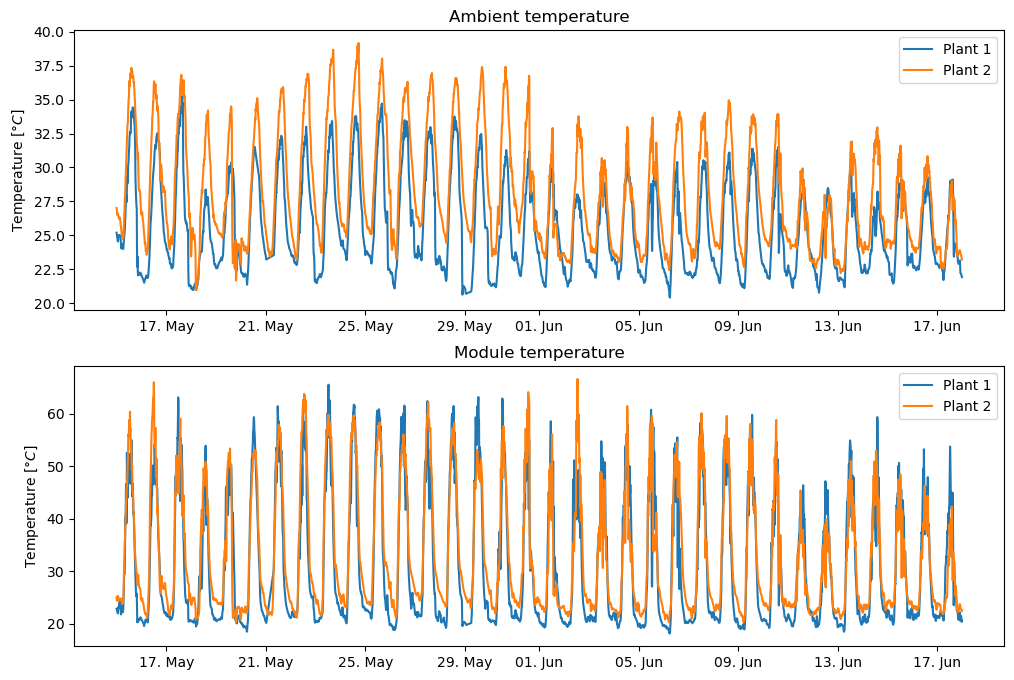

In [5]:
plt.figure(figsize=(12, 8))

# Ambient temperature plot
plt.subplot(2, 1, 1)
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["AMBIENT_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["AMBIENT_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Module temperature plot
plt.subplot(2, 1, 2)
plt.title("Module temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["MODULE_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["MODULE_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))


## Irradiation plot

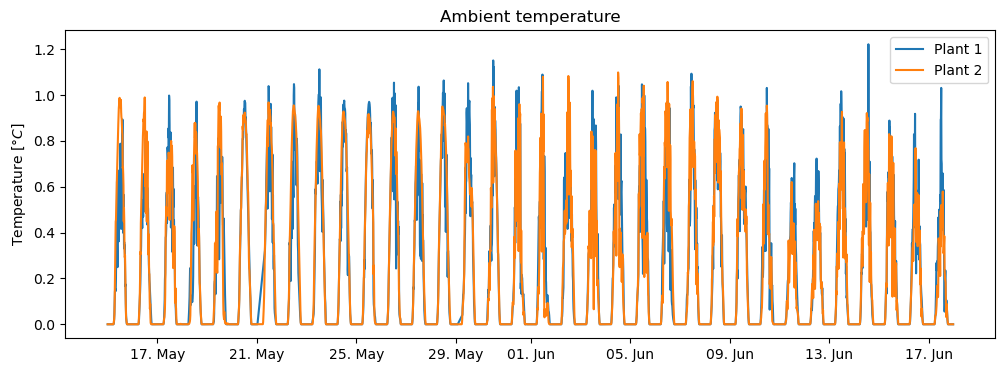

In [6]:
plt.figure(figsize=(12, 4))

# Irradiation plot
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["IRRADIATION"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["IRRADIATION"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Plant data

The plant data set consist of:
- DATE_TIME
- PLANT_ID
- SOURCE_KEY
- DC_POWER
- AC_POWER
- DAILY_YIELD
- TOTAL_YIELD

In [7]:
plant1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0

How many inverters do we have on each plant?

In [8]:
inverters1 = plant1["SOURCE_KEY"].nunique()
inverters2 = plant2["SOURCE_KEY"].nunique()
print(f"Plant 1 has {inverters1} inverters, and plant 2 has {inverters2} inverters.")

Plant 1 has 22 inverters, and plant 2 has 22 inverters.


## Power plots

Below plots the AC & DC power for each inverter for plant 1, during a single day. The interval can be changed in the plt.xlim() function, or removed for plotting of the entire dataset.

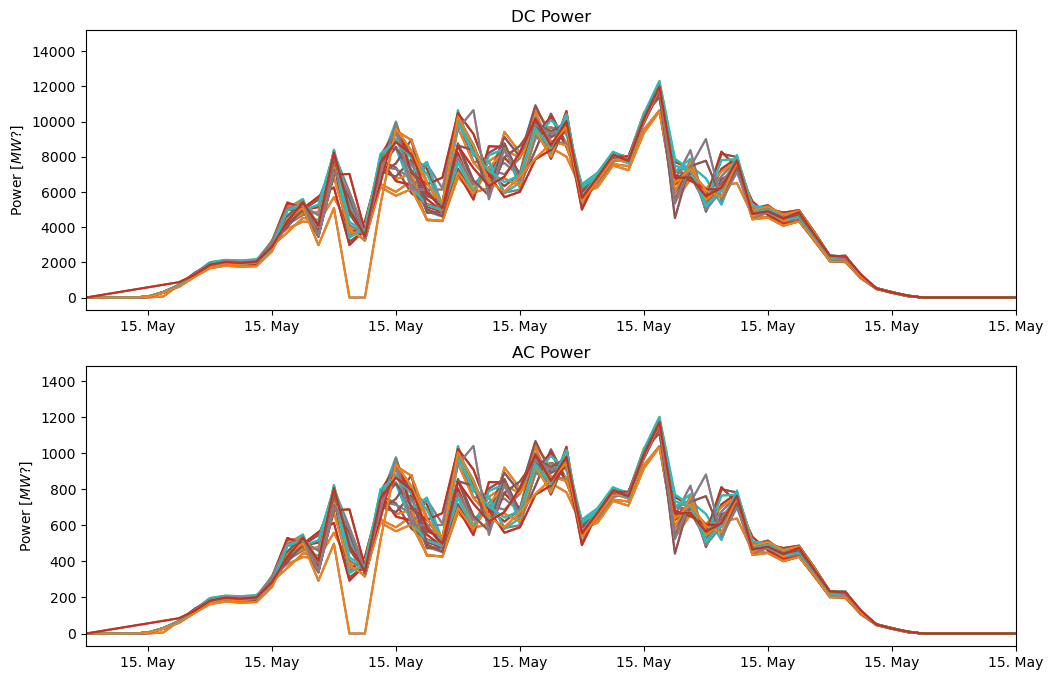

In [9]:
plt.figure(figsize=(12, 8))

for i, key in enumerate(plant1["SOURCE_KEY"].unique()):
    inverter = plant1[plant1["SOURCE_KEY"] == key]
    time = inverter["DATE_TIME"]
    dc_power = inverter["DC_POWER"]
    ac_power = inverter["AC_POWER"]
    
    # Ambient temperature plot
    plt.subplot(2, 1, 1)
    plt.title("DC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, dc_power)
    plt.plot(time, dc_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))
    
    # Module temperature plot
    plt.subplot(2, 1, 2)
    plt.title("AC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, ac_power)
    plt.plot(time, ac_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))

# Andis ML tests

In [10]:

# OBS Some code are copied from Kaggle https://www.kaggle.com/code/tobi4tech/solar-power-generation-forecast-with-different-ml

plant1.info()
print("\n ########## \n")
plant2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3

In [11]:
weather1.info()
print("\n ########## \n")
weather2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB

 ########## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   S

In [12]:


plant1_tot_data=pd.merge(plant1.drop(columns=["PLANT_ID"]), weather1.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
# plant1_tot_data['HOUR'] = pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.hour+(pd.to_datetime(plant1_tot_data['DATE_TIME'].astype(str)).dt.minute)/60
# plant1_tot_data['MIDDAYNESS'] = abs(12-abs(plant1_tot_data['HOUR']-12)) 
    # Only maybe use MIDDAYNESS. It has better correlations with power generation than HOUR
    # Or maybe use polynomial features - preprocessing on HOURS???
display(plant1_tot_data)
display(plant1_tot_data.isnull().sum())
display(plant1_tot_data.count())
display(plant1_tot_data.describe())

# display(plant1_tot_data[10000+100:10050+100])
# print("\n ########## \n")

# plant2_tot_data=pd.merge(plant2.drop(columns=["PLANT_ID"]), weather2.drop(columns=["PLANT_ID","SOURCE_KEY"]), on="DATE_TIME")
# display(plant2_tot_data)
# display(plant2_tot_data.isnull().sum())
# display(plant1_tot_data.count())
# display(plant1_tot_data.describe())

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1     2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2     2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3     2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4     2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                   ...              ...       ...       ...          ...   
68769 2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
68770 2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
68771 2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
68772 2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
68773 2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0        6259559.0            25.184316           22.857507          0.0  
1        6183645.0            25.184316           22.857507          0.0  
2        6987759.0            25.184316           22.857507          0.0  
3        7602960.0            25.184316           22.857507          0.0  
4        7158964.0            25.184316           22.857507          0.0  
...            ...                  ...                 ...          ...  
68769    7287002.0            21.909288           20.427972          0.0  
68770    7028601.0            21.909288           20.427972          0.0  
68771    7251204.0            21.909288           20.427972          0.0  
68772    6583369.0            21.909288           20.427972          0.0  
68773    7363272.0            21.909288           20.427972          0.0  

[68774 rows x 9 columns]

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

DATE_TIME              68774
SOURCE_KEY             68774
DC_POWER               68774
AC_POWER               68774
DAILY_YIELD            68774
TOTAL_YIELD            68774
AMBIENT_TEMPERATURE    68774
MODULE_TEMPERATURE     68774
IRRADIATION            68774
dtype: int64

DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  68774.000000  68774.000000  68774.000000  6.877400e+04   
mean    3147.177450    307.778375   3295.834644  6.978728e+06   
std     4036.441826    394.394865   3145.220597  4.162707e+05   
min        0.000000      0.000000      0.000000  6.183645e+06   
25%        0.000000      0.000000      0.000000  6.512007e+06   
50%      428.571429     41.450000   2658.473214  7.146685e+06   
75%     6365.468750    623.561161   6274.000000  7.268751e+06   
max    14471.125000   1410.950000   9163.000000  7.846821e+06   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count         68774.000000        68774.000000  68774.000000  
mean             25.558521           31.244997      0.232305  
std               3.361300           12.308283      0.301948  
min              20.398505           18.140415      0.000000  
25%              22.724491           21.123944      0.000000  
50%              24.670178           24.818984      0.031620  
75%              27.960429           41.693659      0.454880  
max              35.252486           65.545714      1.221652

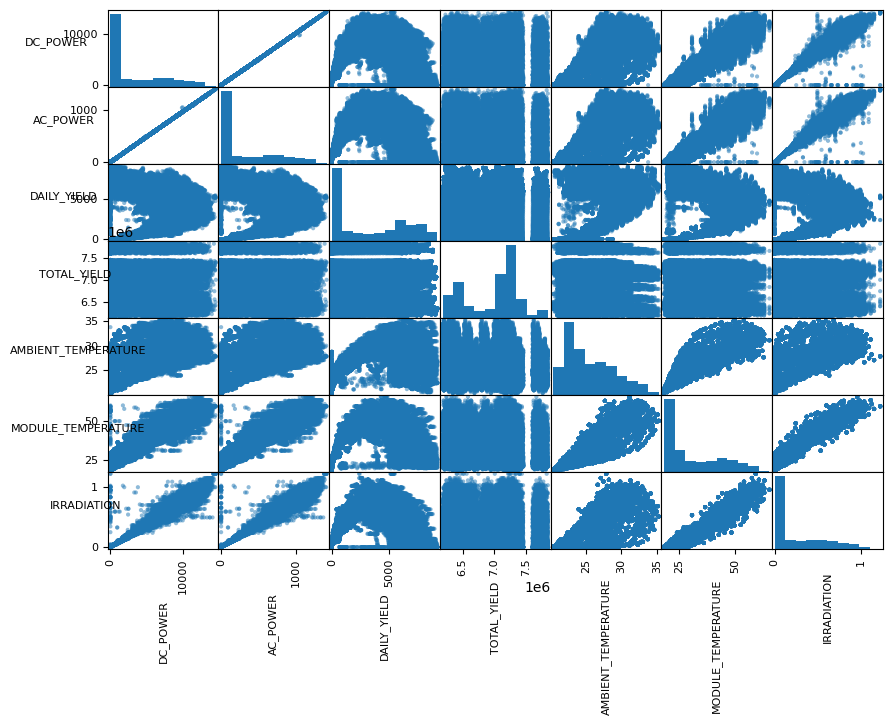

In [13]:

# from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(plant1_tot_data, figsize=(10,7))
[ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 90) for ax in axes.ravel()]
[ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 0) for ax in axes.ravel()]
plt.show()


C:\Users\andir\AppData\Local\Temp\ipykernel_16400\385972341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\385972341.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)


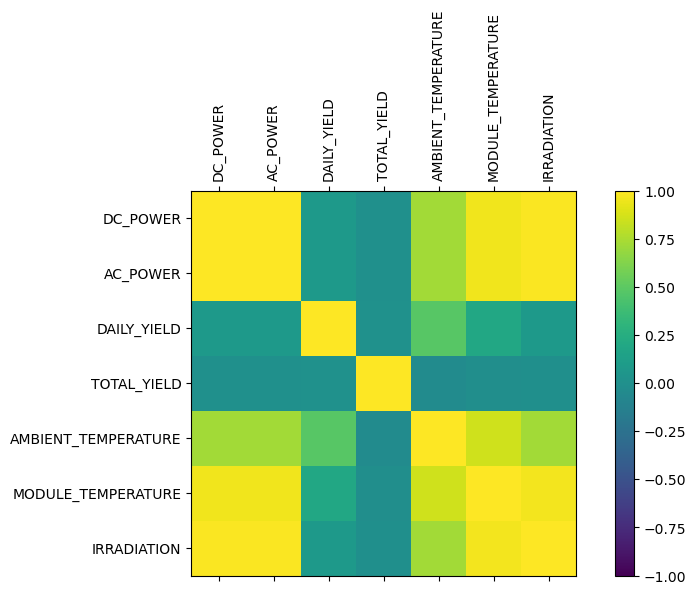

C:\Users\andir\AppData\Local\Temp\ipykernel_16400\385972341.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


In [14]:

correlations = plant1_tot_data.corr()
# plot correlation matrix 
    # Made this way, underneath, to get more option, like colorbar. -Andi
fig = plt.figure(figsize=(10, 5)) # Create empty figure.
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, rotation=90, fontsize=10)
ax.set_yticklabels(plant1_tot_data.drop(columns=["SOURCE_KEY"]).columns, fontsize=10)
# Note that the column "SOURCE_KEY" is automatically obmitted, since it is not numerical values.
plt.show()

# Or just use:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


In [15]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result

#Dropping parameters, not usable for predicting AC_POWER
# plant1_tot_data_short=plant1_tot_data.drop(['DATE_TIME','SOURCE_KEY','DC_POWER','DAILY_YIELD','TOTAL_YIELD'],axis=1)

feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR']
# feature_names=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'MIDDAYNESS']
X = plant1_tot_data[feature_names]
y = plant1_tot_data['AC_POWER']


# Just to write out nice table for example data
# display(X)
Xy=pd.concat([X, y], axis=1)
display(Xy[1000:1015])
display(X[1000:1015])
display(y[1000:1015])


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


#Making scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Fitting scaler to the data
scaler.fit(X_test)

#Transform the data to normal distributions
X_test=pd.DataFrame(scaler.transform(X_test))
X_train=pd.DataFrame(scaler.transform(X_train))

display(X_test)



AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION    AC_POWER
1000            30.287073           49.841364     0.557069  676.071429
1001            30.287073           49.841364     0.557069  712.775000
1002            30.287073           49.841364     0.557069  790.200000
1003            30.287073           49.841364     0.557069  719.062500
1004            30.287073           49.841364     0.557069  690.757143
1005            30.287073           49.841364     0.557069  568.571429
1006            30.287073           49.841364     0.557069  757.571429
1007            30.287073           49.841364     0.557069  752.642857
1008            30.287073           49.841364     0.557069  656.571429
1009            30.287073           49.841364     0.557069  682.442857
1010            30.287073           49.841364     0.557069  593.814286
1011            30.287073           49.841364     0.557069  547.400000
1012            30.287073           49.841364     0.557069  704.114286
1013            30.287073           49.841364     0.557069  646.214286
1014            30.811049           47.836383     0.467987  920.042857

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
1000            30.287073           49.841364     0.557069
1001            30.287073           49.841364     0.557069
1002            30.287073           49.841364     0.557069
1003            30.287073           49.841364     0.557069
1004            30.287073           49.841364     0.557069
1005            30.287073           49.841364     0.557069
1006            30.287073           49.841364     0.557069
1007            30.287073           49.841364     0.557069
1008            30.287073           49.841364     0.557069
1009            30.287073           49.841364     0.557069
1010            30.287073           49.841364     0.557069
1011            30.287073           49.841364     0.557069
1012            30.287073           49.841364     0.557069
1013            30.287073           49.841364     0.557069
1014            30.811049           47.836383     0.467987

1000    676.071429
1001    712.775000
1002    790.200000
1003    719.062500
1004    690.757143
1005    568.571429
1006    757.571429
1007    752.642857
1008    656.571429
1009    682.442857
1010    593.814286
1011    547.400000
1012    704.114286
1013    646.214286
1014    920.042857
Name: AC_POWER, dtype: float64

0         1         2
0      1.391744  1.687118  1.974073
1     -0.521415 -0.662724 -0.762202
2      0.555546  0.829092  0.625532
3     -0.828388 -0.846167 -0.769243
4      0.282752 -0.121743 -0.556267
...         ...       ...       ...
13750 -1.130466 -0.889852 -0.769243
13751 -0.452780 -0.631858 -0.739665
13752 -0.952195 -0.842954 -0.769243
13753  0.468261 -0.530212 -0.768913
13754  0.989099  1.685832  1.743809

[13755 rows x 3 columns]

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_score = lr_model.score(X_test, y_test)
print(f"Linear regression score is {lr_score*100:.4f} %")

Linear regression score is 98.0029 %


In [17]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can use gridsearch and cross-validation instead of for-loop. NOTE this is just copied
from sklearn import neighbors

score_list = []
n_neighbors_list = []

# for loop to find best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score = knn.score(X_test, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f} %")

Best n_neighbor at 20 with 98.6593 %


In [18]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can change more settings for decision tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_impurity_decrease=0.0, max_depth=None,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")


from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 3), dpi=300)
# tree_dot = plot_tree(dtr, feature_names=feature_names) # Takes >2min to plot


from sklearn.model_selection import GridSearchCV
# knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
# param_grid = {'min_impurity_decrease': range(0, 10), 'max_depth': range(2, 8)}
# grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
param_grid = {'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))






Score is 98.6513 %
{'max_depth': 7, 'min_impurity_decrease': 0}
0.9841073465614651


Score is 97.4877 %


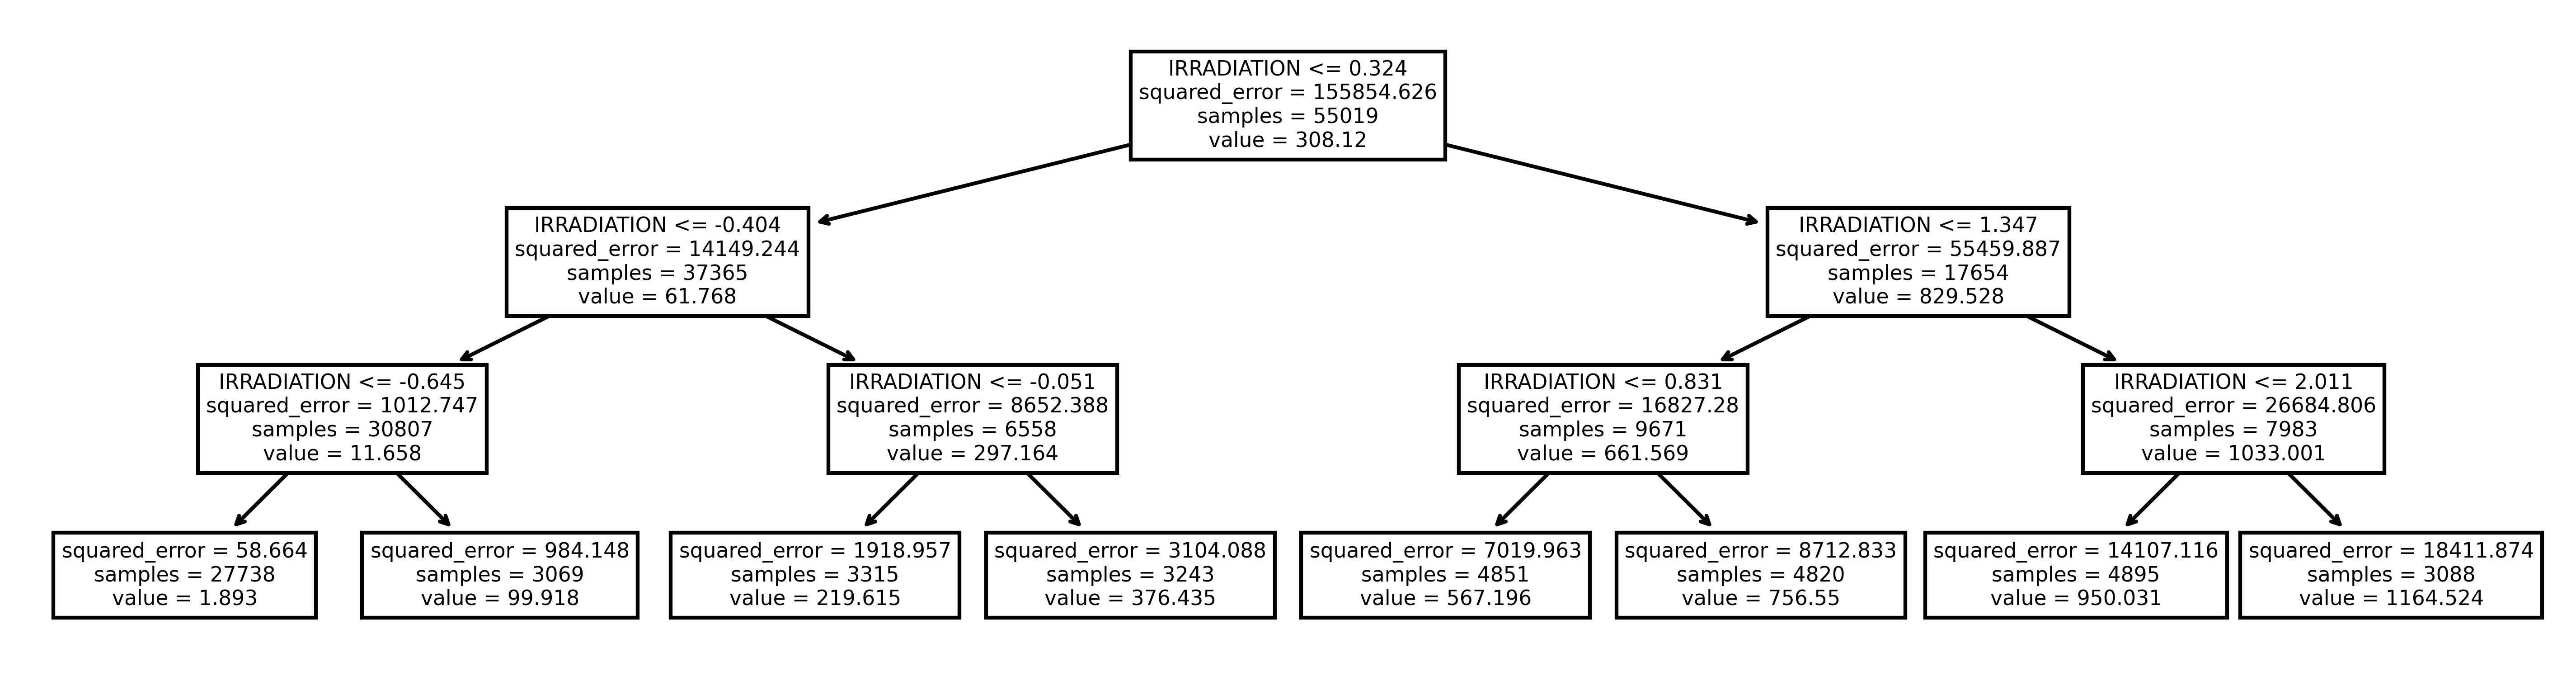

In [19]:
# dtr = DecisionTreeRegressor(min_impurity_decrease=15, max_depth=6,  random_state=42)
dtr = DecisionTreeRegressor(min_impurity_decrease=15, max_depth=3,  random_state=42)
dtr.fit(X_train,y_train)

dtr_score = dtr.score(X_test, y_test)
print(f"Score is {dtr_score*100:.4f} %")

plt.figure(figsize=(12, 3), dpi=600)
tree_dot = plot_tree(dtr, feature_names=feature_names)



In [20]:
# Change later. Copied directly from Kaggle, just to see results, and see whether I get  close to the same result
# Can change more settings for decision tree / random forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, min_impurity_decrease=0.0, max_depth=None,  random_state=42)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")


Score is 98.6503 %


In [21]:

# param_grid = {'n_estimators': range(100,200,10), 'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
param_grid_tree = {'n_estimators': range(2,20,2)}
grid = GridSearchCV(RandomForestRegressor(min_impurity_decrease=15-5, max_depth=7+5, random_state=42), param_grid=param_grid_tree, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'n_estimators': 18}
0.98343717523457


0    0.981815
1    0.982058
2    0.982293
3    0.982392
4    0.982397
5    0.982432
6    0.982422
7    0.982416
8    0.982450
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.049364      0.003851         0.002848        0.000672   
1       0.089492      0.007197         0.003203        0.000510   
2       0.134847      0.011287         0.005865        0.002448   
3       0.160841      0.001978         0.004549        0.000480   
4       0.204875      0.002637         0.005911        0.000527   
5       0.258222      0.007078         0.006919        0.000847   
6       0.315220      0.026819         0.007429        0.000717   
7       0.333996      0.003361         0.007862        0.000466   
8       0.373454      0.015904         0.009033        0.000984   

  param_n_estimators                params  split0_test_score  \
0                  2   {'n_estimators': 2}           0.985774   
1                  4   {'n_estimators': 4}           0.985861   
2                  6   {'n_estimators': 6}           0.985981   
3                  8   {'n_estimators': 8}           0.985893   
4                 10  {'n_estimators': 10}           0.985934   
5                 12  {'n_estimators': 12}           0.986000   
6                 14  {'n_estimators': 14}           0.986055   
7                 16  {'n_estimators': 16}           0.986024   
8                 18  {'n_estimators': 18}           0.986003   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.981990           0.979666           0.983256  ...   
1           0.982232           0.979755           0.983685  ...   
2           0.982376           0.980146           0.983629  ...   
3           0.982487           0.980266           0.983739  ...   
4           0.982631           0.980148           0.983723  ...   
5           0.982692           0.980165           0.983725  ...   
6           0.982706           0.980130           0.983640  ...   
7           0.982688           0.980199           0.983615  ...   
8           0.982724           0.980300           0.983571  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.981815        0.002613                9            0.982070   
1         0.982058        0.002583                8            0.982416   
2         0.982293        0.002398                7            0.982468   
3         0.982392        0.002304                6            0.982536   
4         0.982397        0.002345                5            0.982528   
5         0.982432        0.002356                2            0.982585   
6         0.982422        0.002371                3            0.982645   
7         0.982416        0.002351                4            0.982634   
8         0.982450        0.002298                1            0.982659   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.982631            0.982978            0.982495   
1            0.982800            0.983199            0.982855   
2            0.982830            0.983340            0.982997   
3            0.983020            0.983431            0.983058   
4            0.983092            0.983384            0.983058   
5            0.983191            0.983396            0.983052   
6            0.983192            0.983389            0.983076   
7            0.983175            0.983426            0.983088   
8            0.983211            0.983496            0.983111   

   split4_train_score  mean_train_score  std_train_score  
0            0.983151          0.982665         0.000379  
1            0.983650          0.982984         0.000415  
2            0.983745          0.983076         0.000437  
3            0.983845          0.983178         0.000439  
4            0.983769          0.983166         0.000409  
5            0.983739          0.983192         0.000382  
6            0.983708          0.983202         0.000351  
7            0.983702          0.983205         0.000357  
8            0.983730          0.983242         0.000364  

[9 rows x 21 colu

c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\1893483742.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_n_estimators.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\1893483742.py:11: DeprecationWarning: `np.int` is a deprecate

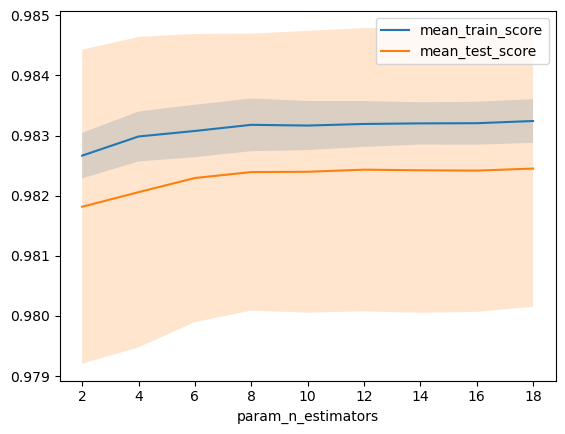

In [22]:
# import pandas as pd
results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_n_estimators', 'mean_train_score')
results.plot('param_n_estimators', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_estimators.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()


{'min_impurity_decrease': 0}
0.9862420135357768
0    0.984666
1    0.984163
2    0.983633
3    0.983310
4    0.983061
5    0.982937
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.289409      0.017348         0.010404        0.000831   
1       0.226157      0.030468         0.006861        0.000723   
2       0.183825      0.006877         0.005620        0.000281   
3       0.176920      0.007265         0.005511        0.000443   
4       0.176317      0.010180         0.005197        0.000239   
5       0.172160      0.004640         0.005504        0.001042   

  param_min_impurity_decrease                        params  \
0                           0  {'min_impurity_decrease': 0}   
1                           1  {'min_impurity_decrease': 1}   
2                           2  {'min_impurity_decrease': 2}   
3                           3  {'min_impurity_decrease': 3}   
4                           4  {'min_impurity_decrease': 4}   
5                           5  {'min_impurity_decrease': 5}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.987934           0.984871           0.983394           0.986028   
1           0.987436           0.984351           0.982838           0.985537   
2           0.986899           0.983870           0.982191           0.984914   
3           0.986597           0.983377           0.981615           0.984547   
4           0.986386           0.983209           0.981372           0.984322   
5           0.986154           0.983020           0.981122           0.984131   

   ...  mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  ...         0.984666        0.002318                1            0.985995   
1  ...         0.984163        0.002311                2            0.985299   
2  ...         0.983633        0.002264                3            0.984437   
3  ...         0.983310        0.002173                4            0.983896   
4  ...         0.983061        0.002227                5            0.983499   
5  ...         0.982937        0.002109                6            0.983211   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.986705            0.986916            0.986469   
1            0.985980            0.986216            0.985745   
2            0.985213            0.985403            0.984945   
3            0.984610            0.984834            0.984396   
4            0.984227            0.984472            0.983983   
5            0.983936            0.984214            0.983711   

   split4_train_score  mean_train_score  std_train_score  
0            0.987547          0.986726         0.000512  
1            0.986837          0.986015         0.000511  
2            0.986080          0.985215         0.000541  
3            0.985379          0.984623         0.000489  
4            0.984967          0.984229         0.000489  
5            0.984454          0.983905         0.000428  

[6 rows x 21 columns]

c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\160871808.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\160871808.py:19: DeprecationWarning: `np.int` is a d

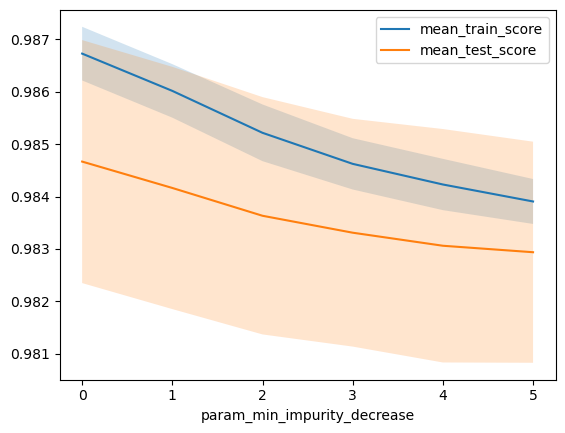

In [23]:

# param_grid = {'n_estimators': range(100,200,10), 'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
param_grid_tree = {'min_impurity_decrease': range(0,6,1)}
grid = GridSearchCV(RandomForestRegressor(n_estimators=8, max_depth=7+5, random_state=42), param_grid=param_grid_tree, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_min_impurity_decrease', 'mean_train_score')
results.plot('param_min_impurity_decrease', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_min_impurity_decrease.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()



{'max_depth': 14}
0.9863604552331009
0    0.947586
1    0.980867
2    0.982731
3    0.983808
4    0.984390
5    0.984666
6    0.984733
7    0.984714
8    0.984709
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.096447      0.018272         0.004216        0.001209   
1       0.216326      0.048353         0.007367        0.002327   
2       0.252497      0.057428         0.006885        0.001714   
3       0.250332      0.061329         0.008071        0.001699   
4       0.297930      0.018081         0.009688        0.000952   
5       0.322085      0.058883         0.010881        0.002405   
6       0.247831      0.002821         0.008907        0.000267   
7       0.279291      0.023654         0.010476        0.001601   
8       0.353523      0.073500         0.013745        0.004715   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.950058           0.947742   
1               4   {'max_depth': 4}           0.984747           0.981101   
2               6   {'max_depth': 6}           0.986233           0.982930   
3               8   {'max_depth': 8}           0.987158           0.983953   
4              10  {'max_depth': 10}           0.987659           0.984543   
5              12  {'max_depth': 12}           0.987934           0.984871   
6              14  {'max_depth': 14}           0.987940           0.984932   
7              16  {'max_depth': 16}           0.987900           0.984931   
8              18  {'max_depth': 18}           0.987870           0.984933   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.946044           0.949673  ...         0.947586        0.002142   
1           0.978786           0.982033  ...         0.980867        0.002492   
2           0.980495           0.984208  ...         0.982731        0.002372   
3           0.982001           0.985205  ...         0.983808        0.002279   
4           0.983003           0.985643  ...         0.984390        0.002238   
5           0.983394           0.986028  ...         0.984666        0.002318   
6           0.983529           0.986055  ...         0.984733        0.002278   
7           0.983528           0.986013  ...         0.984714        0.002266   
8           0.983541           0.986012  ...         0.984709        0.002258   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.946512            0.947355   
1                8            0.980445            0.981141   
2                7            0.982584            0.983210   
3                6            0.984326            0.985041   
4                5            0.985407            0.986140   
5                4            0.985995            0.986705   
6                1            0.986166            0.986892   
7                2            0.986213            0.986937   
8                3            0.986223            0.986946   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.948714            0.947930            0.948435   
1            0.981642            0.980566            0.981620   
2            0.983895            0.983159            0.984205   
3            0.985348            0.984862            0.985895   
4            0.986405            0.985922            0.987015   
5            0.986916            0.986469            0.987547   
6            0.987086            0.986650            0.987733   
7            0.987127            0.986704            0.987785   
8            0.987136            0.986715            0.987794   

   mean_train_score  std_train_score  
0          0.947789         0.000789  
1          0.981083         0.000506  
2          0.983411         0.000575  
3          0.985094         0.000520  
4          0.986178         0.000532  
5          0.986726         0.000512  
6          0.986905         0.000516  
7          0.986953         0.000516  
8          0.986963         0.000516  

[9 rows x 21 columns]

c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\1828207344.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_depth.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\1828207344.py:19: DeprecationWarning: `np.int` is a deprecated 

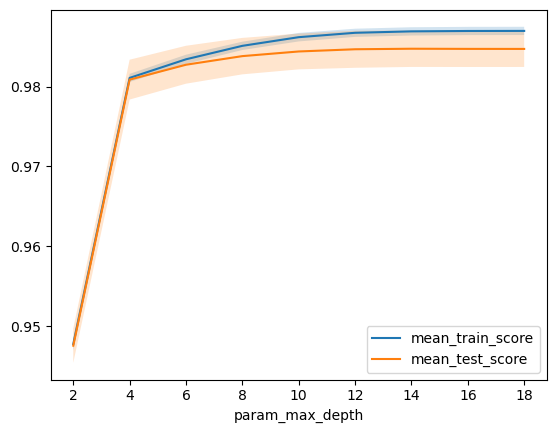

In [24]:

# param_grid = {'n_estimators': range(100,200,10), 'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
param_grid_tree = {'max_depth': range(2,20,2)}
grid = GridSearchCV(RandomForestRegressor(n_estimators=8, min_impurity_decrease=0, random_state=42), param_grid=param_grid_tree, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_depth', 'mean_train_score')
results.plot('param_max_depth', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_depth.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()




{'max_features': 2}
0.9862682467750272
0    0.984625
1    0.984710
2    0.984666
Name: mean_test_score, dtype: float64


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.156216      0.007222         0.010588        0.001111   
1       0.212736      0.023530         0.008859        0.000247   
2       0.240627      0.007054         0.008774        0.000461   

  param_max_features               params  split0_test_score  \
0                  1  {'max_features': 1}           0.987956   
1                  2  {'max_features': 2}           0.987873   
2                  3  {'max_features': 3}           0.987934   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.984707           0.983308           0.985884  ...   
1           0.984959           0.983402           0.985899  ...   
2           0.984871           0.983394           0.986028  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.984625        0.002266                3            0.985735   
1         0.984710        0.002192                1            0.985962   
2         0.984666        0.002318                2            0.985995   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.986328            0.986642            0.985974   
1            0.986701            0.986911            0.986494   
2            0.986705            0.986916            0.986469   

   split4_train_score  mean_train_score  std_train_score  
0            0.987206          0.986377         0.000517  
1            0.987535          0.986721         0.000515  
2            0.987547          0.986726         0.000512  

[3 rows x 21 columns]

c:\Users\andir\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\548603890.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.fill_between(results.param_max_features.astype(np.int),
C:\Users\andir\AppData\Local\Temp\ipykernel_16400\548603890.py:19: DeprecationWarning: `np.int` is a deprecated

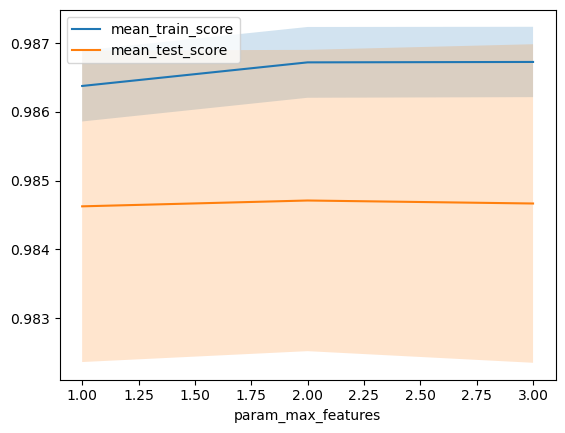

In [25]:


# param_grid = {'n_estimators': range(100,200,10), 'min_impurity_decrease': range(0, 15), 'max_depth': range(2, 8)} 
    # Note that it will always be advantageously to minimize "min_impurity_decrease" and maximize "max_depth".
param_grid_tree = {'max_features': range(1,4,1)}
grid = GridSearchCV(RandomForestRegressor(n_estimators=8, min_impurity_decrease=0, max_depth=12, random_state=42), param_grid=param_grid_tree, cv=5, return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


results = pd.DataFrame(grid.cv_results_)
print(results.loc[:,'mean_test_score'])
display(results)

results.plot('param_max_features', 'mean_train_score')
results.plot('param_max_features', 'mean_test_score', ax=plt.gca()) # Tror "validation" score, but called "test" score; like Rahman has written.
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_max_features.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()




Score is 98.6242 %


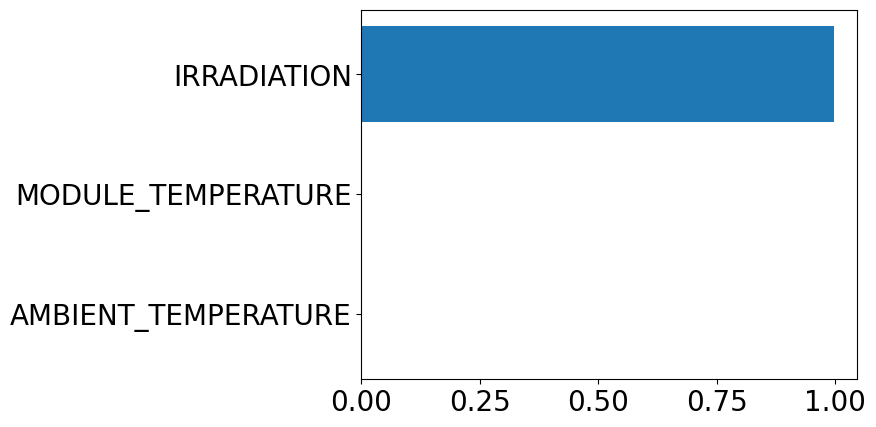

In [26]:
rfr = RandomForestRegressor(n_estimators=8, min_impurity_decrease=0, max_depth=12,  random_state=42) # , max_features=2
# rfr = RandomForestRegressor(n_estimators=8, min_impurity_decrease=0, max_depth=12,  random_state=42, max_features=2)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")


feat_imp = rfr.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)



Score is 98.6268 %


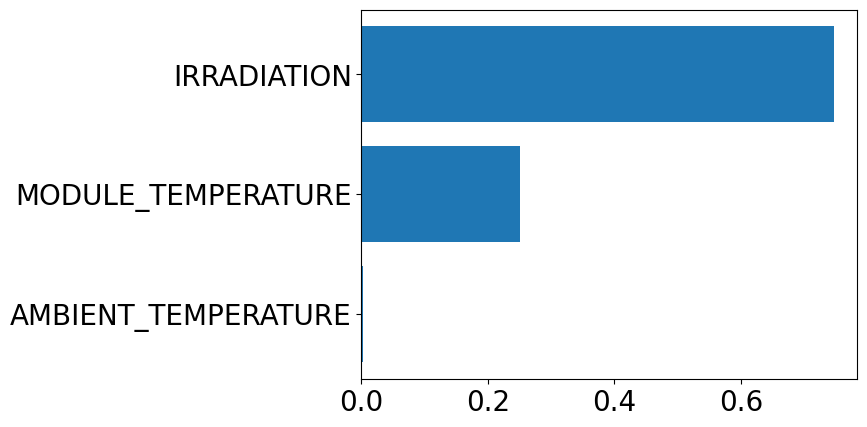

In [27]:
rfr = RandomForestRegressor(n_estimators=8, min_impurity_decrease=0, max_depth=12,  random_state=42, max_features=2)
rfr.fit(X_train,y_train)

rfr_score = rfr.score(X_test, y_test)
print(f"Score is {rfr_score*100:.4f} %")


feat_imp = rfr.feature_importances_
# display(feat_imp)
plt.barh(range(3), rfr.feature_importances_[0:3])
plt.yticks(range(3), feature_names)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


# SVM Julie

In [28]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split



#The svm regressor
svr = SVR()
# svr = LinearSVR()

#Train the model
X_train2 = X_train[1000:2000]
y_train2 = y_train[1000:2000] 
X_test2 = X_test[1:100]
y_test2 = y_test[1:100]
svr.fit(X_train2, y_train2)

# #Make predictions on the test data
# y_pred = svr.predict(X_test)

# Measure the performance
svc_score = svr.score(X_test2, y_test2)
print(f"Score is {svc_score*100:.4f} %")


#https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
#https://vitalflux.com/classification-model-svm-classifier-python-example/

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


grid_search = GridSearchCV(svr, param_grid, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train2, y_train2)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model
print(grid_search.best_estimator_)




Score is 60.6549 %
Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=100, gamma=0.1)
